# **Machine Learning Modelling**

# **1. Dependent Variables**

Since the dependent variables have a high corr with global sales. We decide to do a simple regression to see which region is better at predicting global sales.

Initial data cleaning to prepare for model

In [2]:
predictors = ["JP_Sales", "NA_Sales", "EU_Sales", "Other_Sales", "Global_Sales"]
cleaned_data = null_cleaning(data, predictors)
sales = pd.DataFrame(cleaned_data["Global_Sales"])

Regression model and plotting the results

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [0.30562796]
Coefficients of Regression 	: a =  [[2.91876062]]

For predictor JP_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.40507480820575203
Mean Squared Error (MSE) 	: 1.2064465357551566

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31994597846622364
Mean Squared Error (MSE) 	: 2.379970596528031

Intercept of Regression 	: b =  [0.28344936]
Coefficients of Regression 	: a =  [[5.20583676]]

For predictor Other_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.45631692220240727
Mean Squared Error (MSE) 	: 1.102532847498674

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7035894720242046
Mean Squared Error (MSE) 	: 1.0373416210269475

Intercept of Regression 	: b =  [0.07818658]
Coefficients of Regression 	: a =  [[1.7185844]]

For predictor NA_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.860457025897511
Mean Squared 

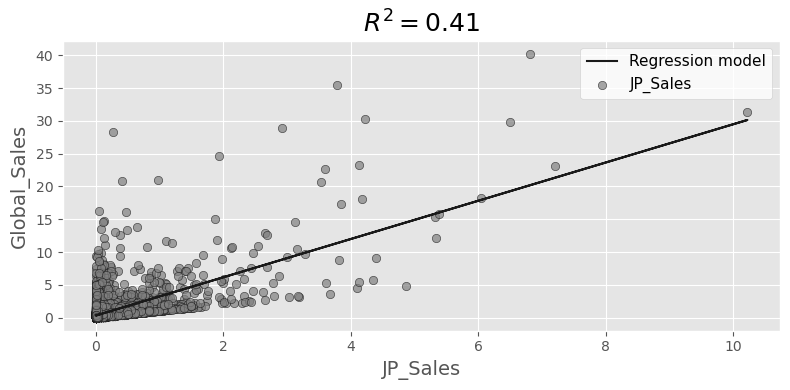

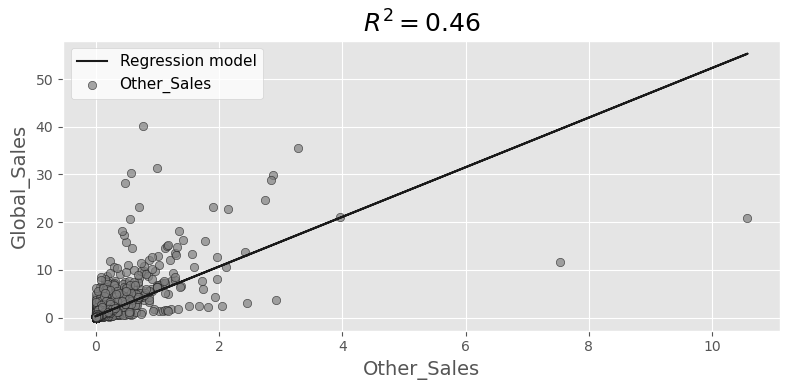

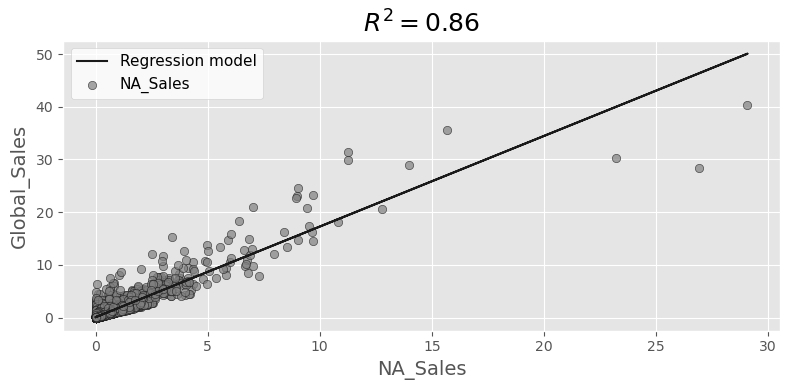

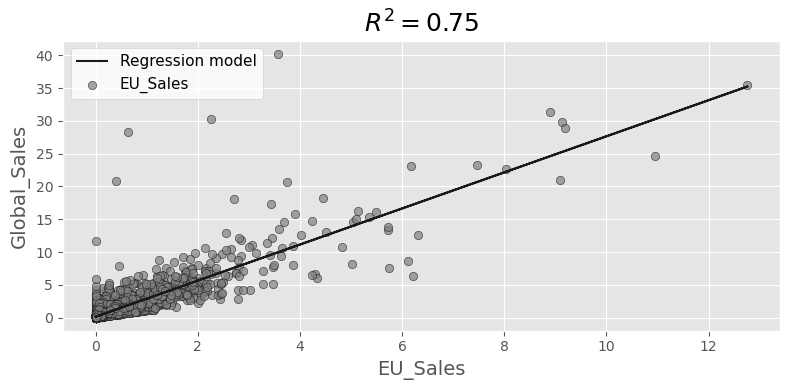

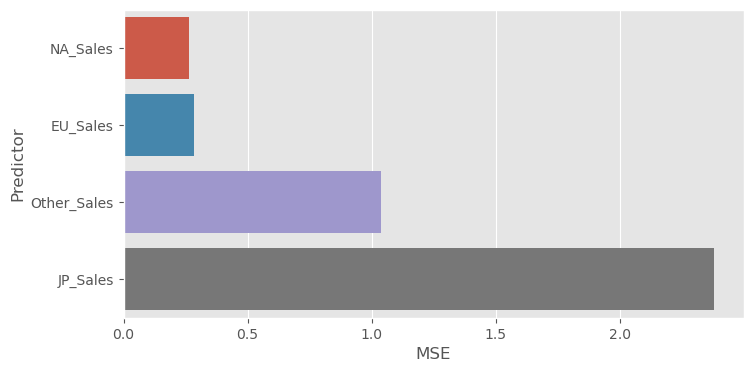

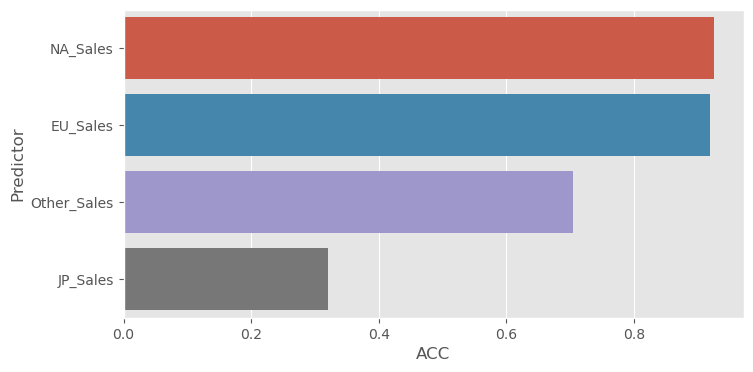

In [4]:
result_listx = []
result_listx.append(reg(cleaned_data,sales, "JP_Sales"))
result_listx.append(reg(cleaned_data,sales, "Other_Sales"))
result_listx.append(reg(cleaned_data,sales, "NA_Sales"))
result_listx.append(reg(cleaned_data,sales, "EU_Sales"))
acc_df = pd.DataFrame(result_listx, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


Let's see if the model changes with some further cleaning.

(9956, 16)
Intercept of Regression 	: b =  [0.11885859]
Coefficients of Regression 	: a =  [[-1.05270564]]

For predictor JP_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03270215216666661
Mean Squared Error (MSE) 	: 0.009230716153268497

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.024162725746383784
Mean Squared Error (MSE) 	: 0.009894240504189716

Intercept of Regression 	: b =  [0.05639676]
Coefficients of Regression 	: a =  [[7.24951241]]

For predictor Other_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5248081164250591
Mean Squared Error (MSE) 	: 0.004534654352268408

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5319007695148705
Mean Squared Error (MSE) 	: 0.004746166690331097

Intercept of Regression 	: b =  [0.02836983]
Coefficients of Regression 	: a =  [[1.16101248]]

For predictor NA_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.878765

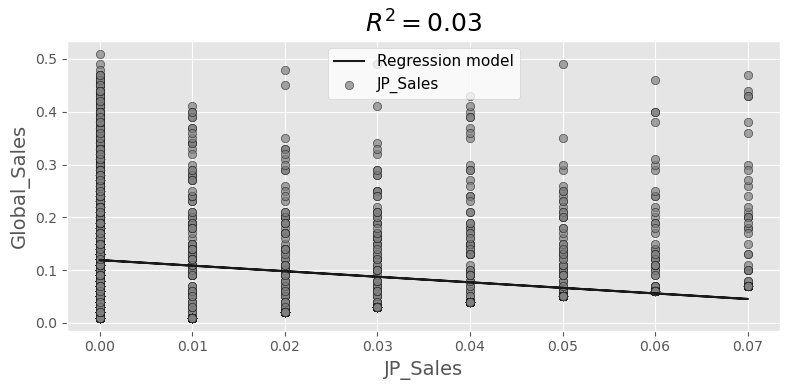

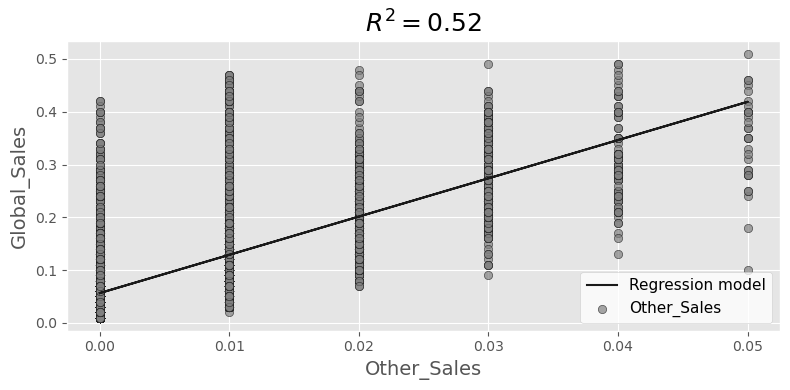

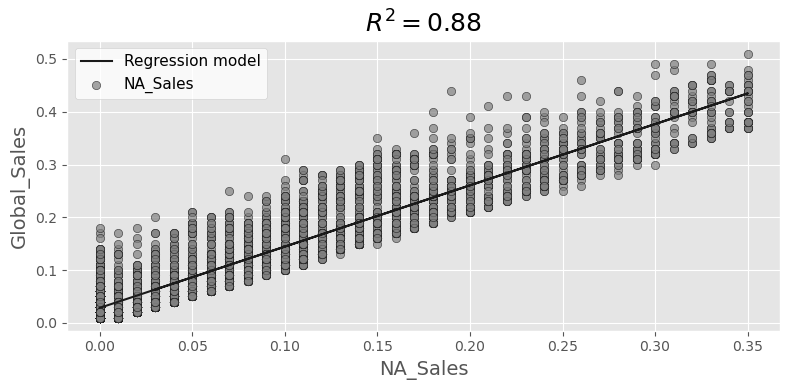

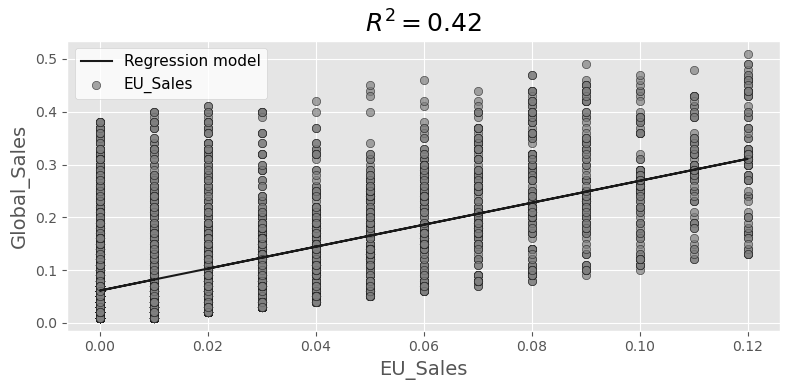

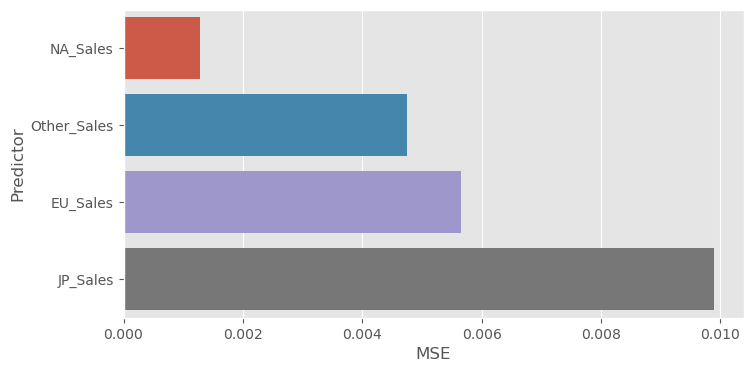

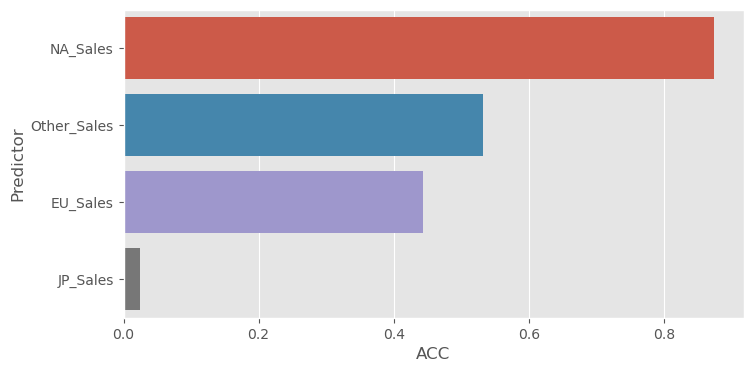

In [5]:
cleaned_data = null_cleaning(data, predictors)
cleaned_data = outlier_cleaning(cleaned_data, ["Global_Sales", "JP_Sales", "Other_Sales", "NA_Sales", "EU_Sales"])
print(cleaned_data.shape)
sales = pd.DataFrame(cleaned_data["Global_Sales"])
result_listc = []
result_listc.append(reg(cleaned_data,sales, "JP_Sales"))
result_listc.append(reg(cleaned_data,sales, "Other_Sales"))
result_listc.append(reg(cleaned_data,sales, "NA_Sales"))
result_listc.append(reg(cleaned_data,sales, "EU_Sales"))
acc_df = pd.DataFrame(result_listc, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

In either cases we can see that NA sales is the best at predicting global sales with EU sales close behind. and Interestingly, there is a significant decrease in the accuracy for JP sales after removing outliers, suggesting that Japan as region might have a different taste from other regions.

Lets try with another model(Gradient Boosting regressor) to see if the results improve

In [6]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8814210168681
Mean Squared Error (MSE) 	: 0.0012022998186318006

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.444317863912701
Mean Squared Error (MSE) 	: 0.005634190088234623

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07174106230065336
Mean Squared Error (MSE) 	: 0.009411832712360605



C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5392591405252274
Mean Squared Error (MSE) 	: 0.004671558459618436

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8814210168681
Mean Squared Error (MSE) 	: 0.0012022998186318006

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.444317863912701
Mean Squared Error (MSE) 	: 0.005634190088234623



C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07174106230065336
Mean Squared Error (MSE) 	: 0.009411832712360605

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5392591405252274
Mean Squared Error (MSE) 	: 0.004671558459618436



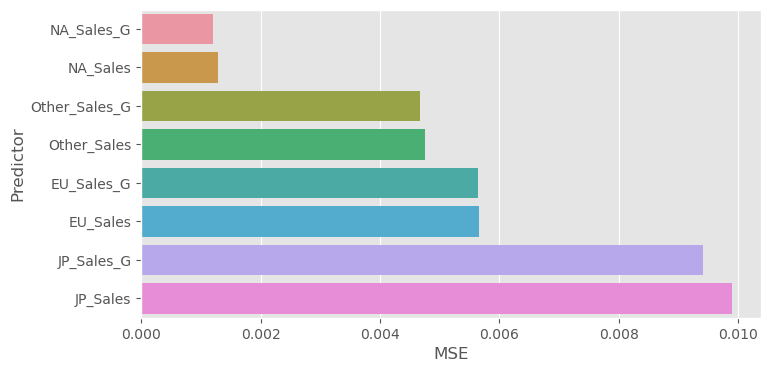

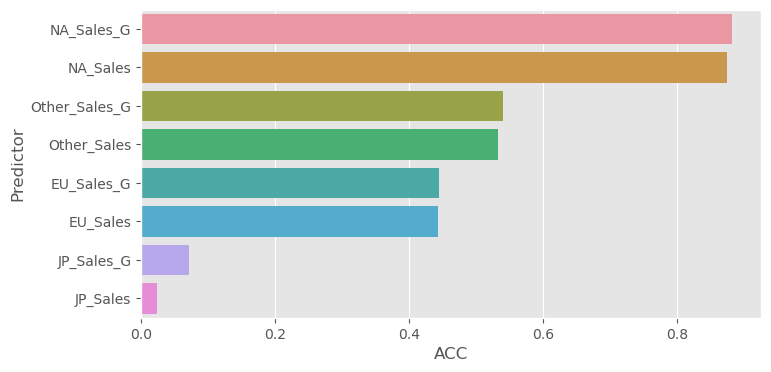

In [7]:
result_list = list(result_listc)
result_listg = []
result_list.append(grad(cleaned_data, sales, "NA_Sales"))
result_list.append(grad(cleaned_data, sales, "EU_Sales"))
result_list.append(grad(cleaned_data, sales, "JP_Sales"))
result_list.append(grad(cleaned_data, sales, "Other_Sales"))
result_listg.append(grad(cleaned_data, sales, "NA_Sales"))
result_listg.append(grad(cleaned_data, sales, "EU_Sales"))
result_listg.append(grad(cleaned_data, sales, "JP_Sales"))
result_listg.append(grad(cleaned_data, sales, "Other_Sales"))
acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


The New model is better in predicting. 

# **2.Rating Scores**

Let see how good rating scores are at predicting global sales.

Initial Cleaning:

In [8]:
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)
cleaned_data = data
cleaning = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'Rating']
cleaned_data = null_cleaning(data, cleaning)
print(cleaned_data.shape)


(6947, 16)


Basic Modelling

       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6826.000000  6947.000000  6947.000000  6947.000000  6947.000000   
mean       2007.437299     0.392840     0.234648     0.063236     0.082189   
std           4.211160     0.961157     0.682293     0.285257     0.267832   
min        1985.000000     0.000000     0.000000     0.000000     0.000000   
25%        2004.000000     0.060000     0.020000     0.000000     0.010000   
50%        2007.000000     0.150000     0.060000     0.000000     0.020000   
75%        2011.000000     0.390000     0.210000     0.010000     0.070000   
max        2016.000000    41.360000    28.960000     6.500000    10.570000   

       Global_Sales  Critic_Score  Critic_Count  User_Score    User_Count  
count   6947.000000   6947.000000   6947.000000  6947.00000   6947.000000  
mean       0.773098     70.263567     28.873615     7.18336    173.821362  
std        1.948883     13.888922     19.195731     1.44200    584.51

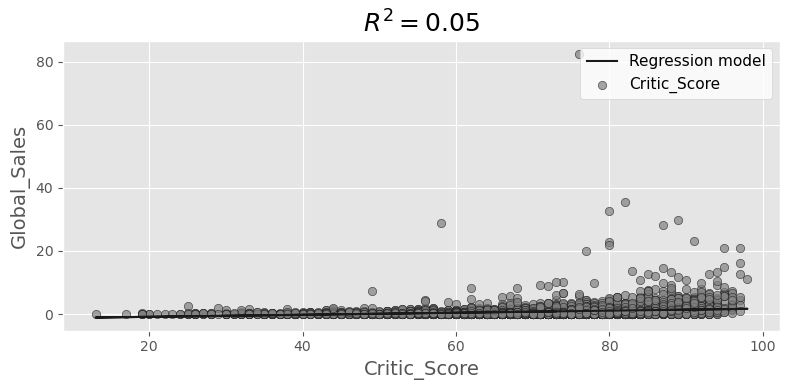

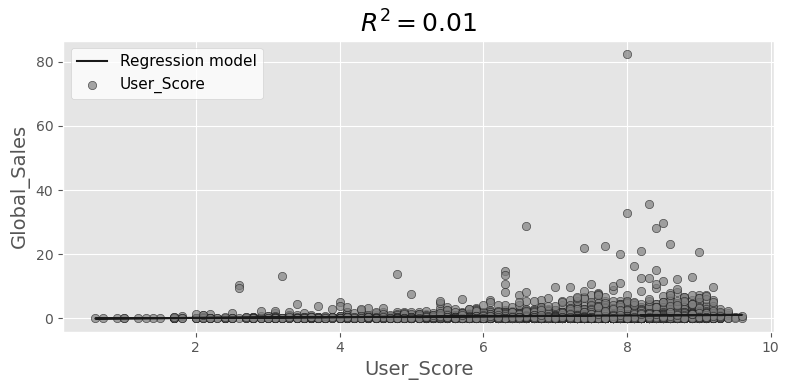

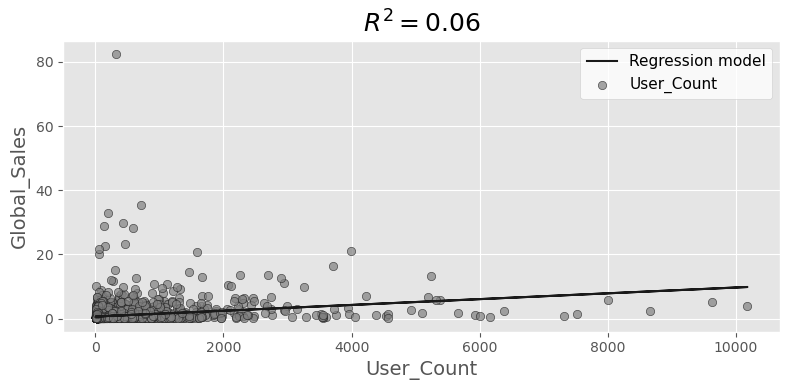

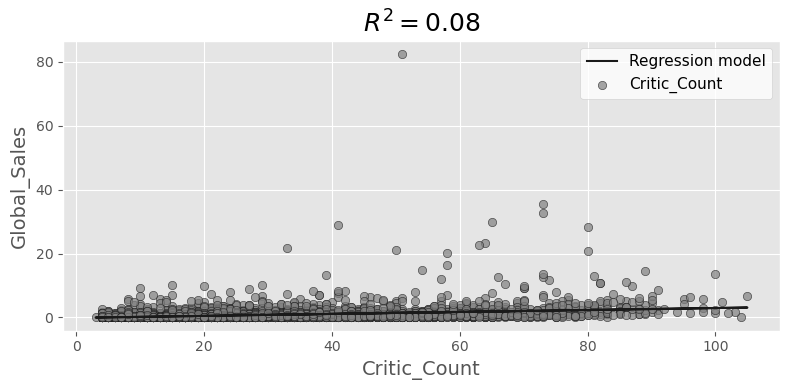

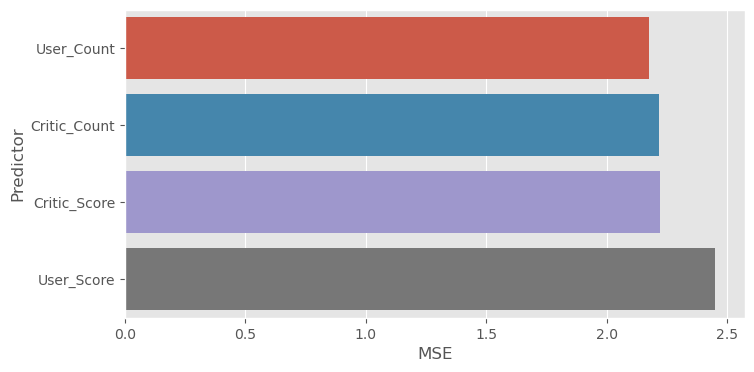

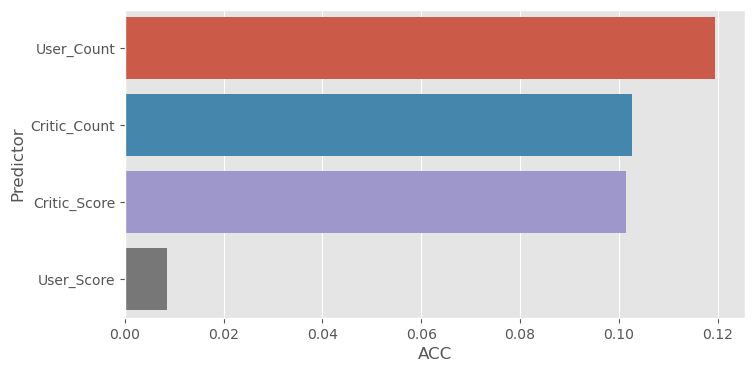

In [9]:
print(cleaned_data.describe())
sales = pd.DataFrame(cleaned_data["Global_Sales"])
predictors = cleaned_data[["Critic_Score", "User_Count", "Critic_Count", "User_Score"]]
correlations = cleaned_data.corr()["Global_Sales"].dropna().sort_values()

result_list = []
result_list.append(reg(predictors,sales, "Critic_Score"))
result_list.append(reg(predictors,sales, "User_Score"))
result_list.append(reg(predictors,sales, "User_Count"))
result_list.append(reg(predictors,sales, "Critic_Count"))
acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

Let's clean the data a bit to see if anything changes

Intercept of Regression 	: b =  [-0.06442262]
Coefficients of Regression 	: a =  [[0.00574246]]

For predictor Critic_Score:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06686800655803216
Mean Squared Error (MSE) 	: 0.08387232186258382

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06170941440313116
Mean Squared Error (MSE) 	: 0.09385336176193515

Intercept of Regression 	: b =  [0.14276913]
Coefficients of Regression 	: a =  [[0.02523945]]

For predictor User_Score:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.015274433848606273
Mean Squared Error (MSE) 	: 0.08850968588689932

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.018872462979589
Mean Squared Error (MSE) 	: 0.09813816644872063

Intercept of Regression 	: b =  [0.26333295]
Coefficients of Regression 	: a =  [[0.00174858]]

For predictor User_Count:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0489233303892299

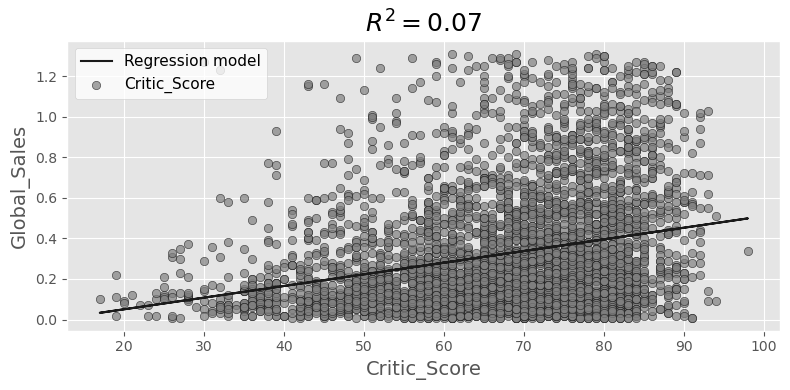

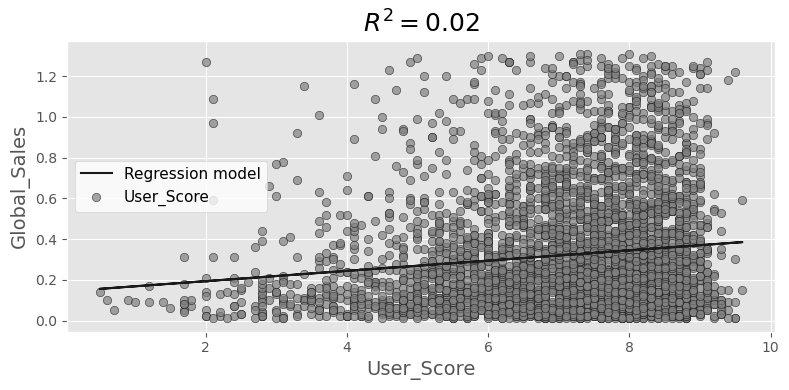

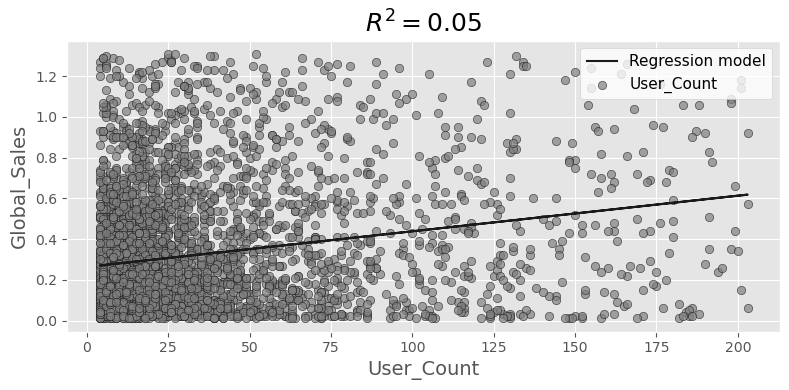

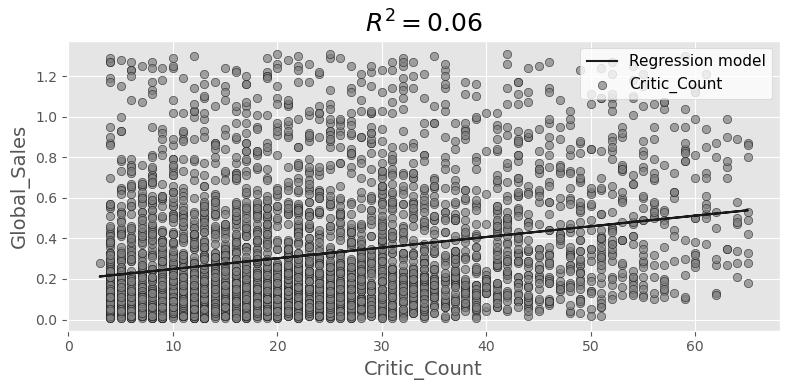

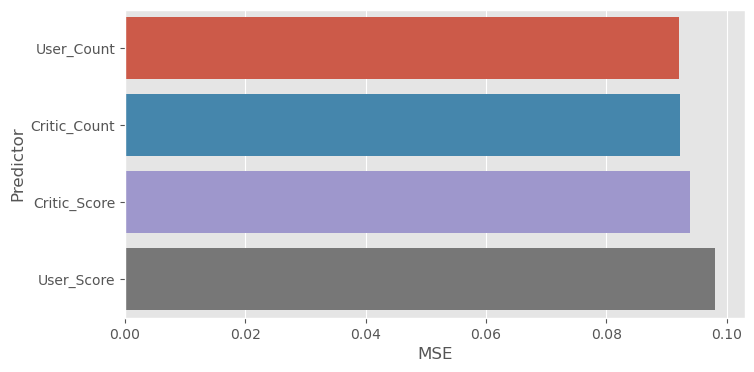

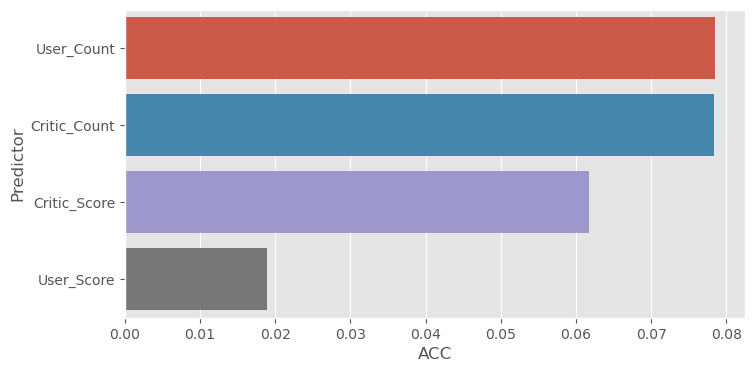

In [10]:
cleaned_data = outlier_cleaning(cleaned_data, ["User_Count", "Critic_Count",  "Global_Sales"])
sales = pd.DataFrame(cleaned_data["Global_Sales"])
predictors = cleaned_data[["Critic_Score", "User_Count", "Critic_Count", "User_Score"]]
correlations = cleaned_data.corr()["Global_Sales"].dropna().sort_values()

result_list = []
result_list.append(reg(predictors,sales, "Critic_Score"))
result_list.append(reg(predictors,sales, "User_Score"))
result_list.append(reg(predictors,sales, "User_Count"))
result_list.append(reg(predictors,sales, "Critic_Count"))
acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


As expected rating scores is not good at predicting global sales

# **3. Genre**

Let's see if this catergorical variable can give any insights

Initial cleaning

In [11]:
predictors = ["JP_Sales", "NA_Sales", "EU_Sales", "Other_Sales", "Global_Sales","Genre"]
cleaned_data = null_cleaning(data, predictors)
cleaned_data = outlier_cleaning(cleaned_data, ["Global_Sales", "JP_Sales", "Other_Sales", "NA_Sales", "EU_Sales"])
print(cleaned_data.shape)
print(cleaned_data["Genre"].value_counts())
sales = pd.DataFrame(cleaned_data["Global_Sales"])

(9955, 16)
Action          2000
Sports          1271
Misc            1115
Adventure       1032
Racing           783
Shooter          724
Role-Playing     717
Simulation       551
Platform         491
Strategy         444
Fighting         423
Puzzle           404
Name: Genre, dtype: int64


Ordinal Encoder to convert our Genre into numerical values

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cleaned_data["Genre_Converted"] = ord_enc.fit_transform(cleaned_data[["Genre"]])

Lets try a normal regression model on this

Intercept of Regression 	: b =  [0.1066434]
Coefficients of Regression 	: a =  [[0.00079072]]

For predictor Genre_Converted:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0009293752860894955
Mean Squared Error (MSE) 	: 0.00953894715199672

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0007940717057434155
Mean Squared Error (MSE) 	: 0.01011628058931567



['Genre_Converted', 0.0007940717057434155, 0.01011628058931567]

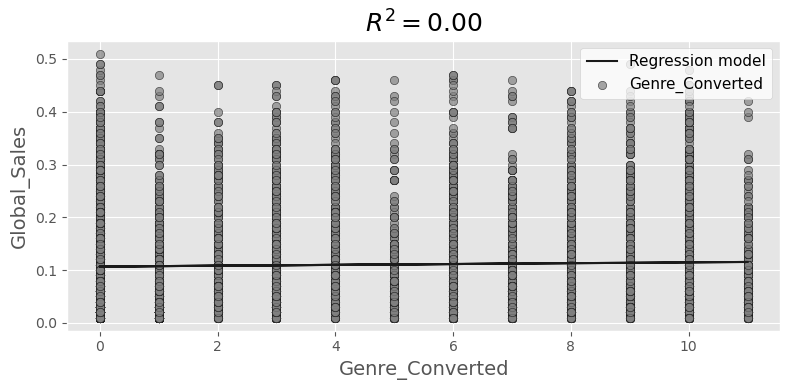

In [13]:
reg(cleaned_data,sales,"Genre_Converted")

Not very ideal. Lets try it with the KNeightborsRegressor model

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
knn = KNeighborsRegressor(n_neighbors=10)
fit_and_eval(cleaned_data, 'Genre_Converted', 'Global_Sales', knn)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.053258633088001384
Mean Squared Error (MSE) 	: 0.010056324537905172


Even worse results.

# **4. Region Sales and Genre**

Intercept of Regression 	: b =  [0.0300491]
Coefficients of Regression 	: a =  [[ 1.16228339e+00 -3.78344210e-04]]

For predictor ['NA_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8793981236498825
Mean Squared Error (MSE) 	: 0.0011514850867173105

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8728591810387516
Mean Squared Error (MSE) 	: 0.0012872143394535617

Intercept of Regression 	: b =  [0.05836785]
Coefficients of Regression 	: a =  [[2.07855202e+00 5.52738995e-04]]

For predictor ['EU_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.42221524298605906
Mean Squared Error (MSE) 	: 0.005516585240371256

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4472443906378468
Mean Squared Error (MSE) 	: 0.005596274685010639

Intercept of Regression 	: b =  [0.11705194]
Coefficients of Regression 	: a =  [[-1.03366073e+00  3.34558371e-04]]

For predi

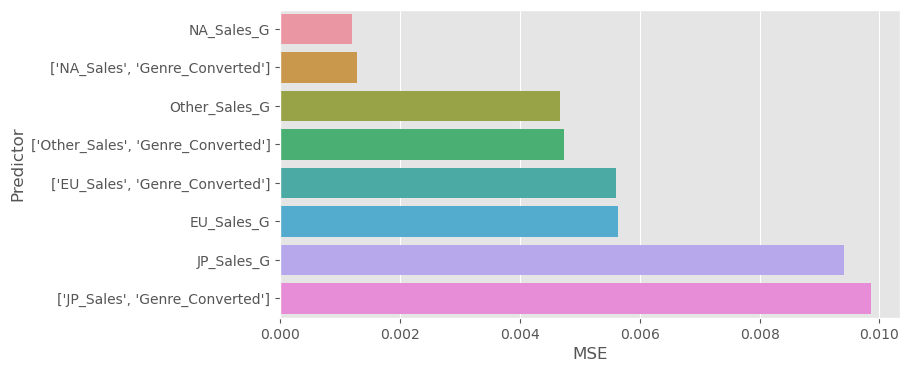

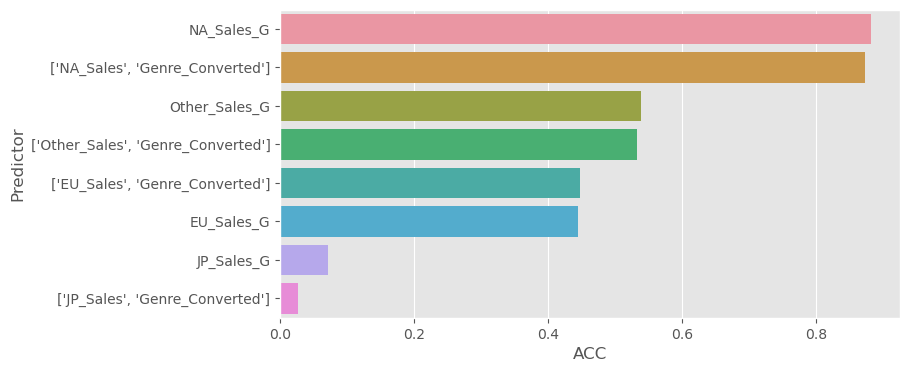

In [16]:
result_list = list(result_listg)
result_list.append(reg(cleaned_data,sales, ["NA_Sales", "Genre_Converted"]))

result_list.append(reg(cleaned_data,sales, ["EU_Sales", "Genre_Converted"]))

result_list.append(reg(cleaned_data,sales, ["JP_Sales", "Genre_Converted"]))

result_list.append(reg(cleaned_data,sales, ["Other_Sales", "Genre_Converted"]))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

A significant decrease when using the base model.

Using a different model(gradient boosting)

C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8839360328921892
Mean Squared Error (MSE) 	: 0.0011750687464155505

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.46179261715010156
Mean Squared Error (MSE) 	: 0.005448983783998742



C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09630352408033038
Mean Squared Error (MSE) 	: 0.009149312328025822

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5514840983968607
Mean Squared Error (MSE) 	: 0.00454091852430549



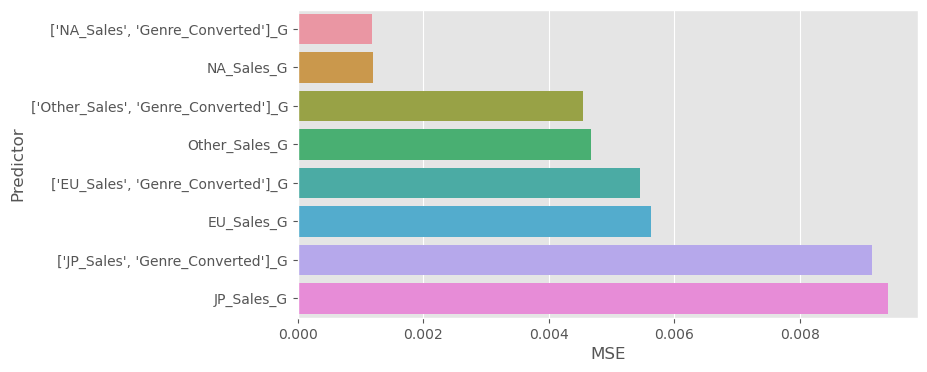

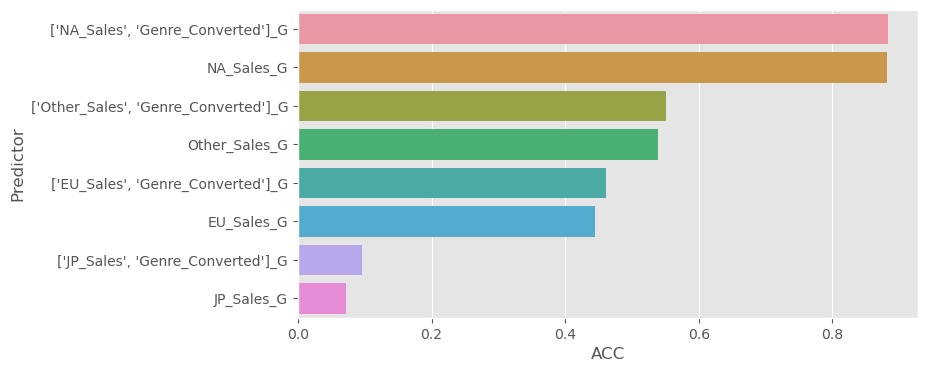

In [17]:
result_list = list(result_listg)
result_list.append(grad(cleaned_data, sales, ["NA_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["EU_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["JP_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["Other_Sales", "Genre_Converted"]))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


A slight improvement when using the same model here.

# **5. Region Sales and Ratings**

Intercept of Regression 	: b =  [0.01528471]
Coefficients of Regression 	: a =  [[-1.11455510e-04  2.49480259e-04  4.32828815e-04  2.75443672e-04
   1.35971193e+00]]

For predictor ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'NA_Sales']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8437514137711783
Mean Squared Error (MSE) 	: 0.0034322551162412943

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8474992409405082
Mean Squared Error (MSE) 	: 0.003757140696748737

Intercept of Regression 	: b =  [0.04753333]
Coefficients of Regression 	: a =  [[ 8.95134328e-04  1.18417562e-03 -5.12657145e-03 -5.18626085e-04
   2.04886880e+00]]

For predictor ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'EU_Sales']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6238525760511888
Mean Squared Error (MSE) 	: 0.00826269185193527

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.60793424578

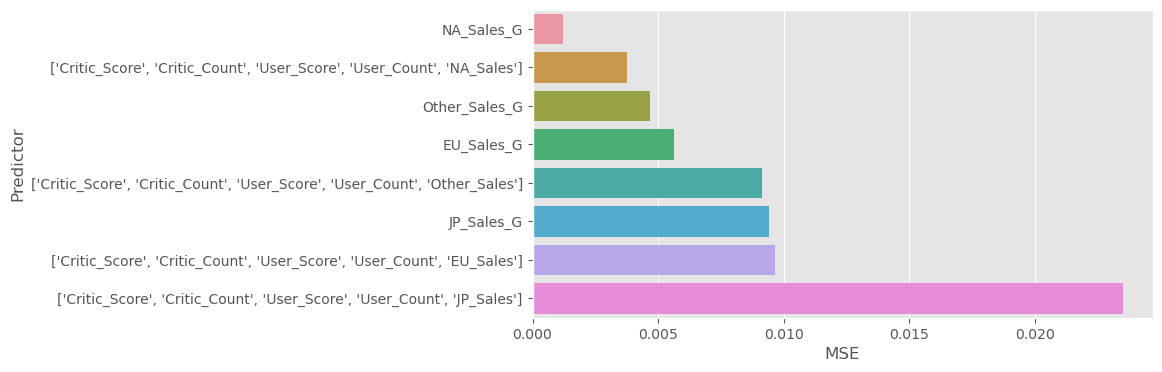

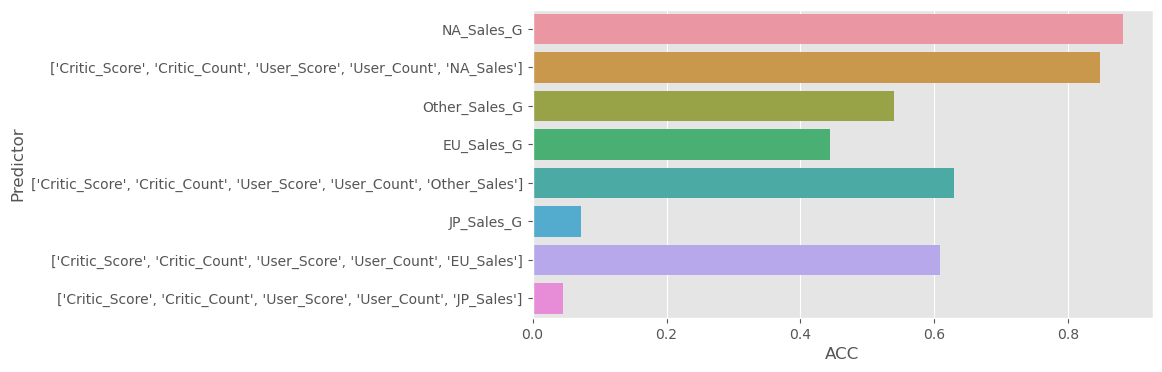

In [18]:
result_list = list(result_listg)
cleaning = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'NA_Sales']
cleaned_data = null_cleaning(data, cleaning)
cleaned_data = outlier_cleaning(cleaned_data, cleaning)
sales = pd.DataFrame(cleaned_data["Global_Sales"])
predictor = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count','NA_Sales']
result_list.append(reg(cleaned_data,sales, predictor))
predictor.pop()
predictor.append('EU_Sales')
result_list.append(reg(cleaned_data,sales, predictor))
predictor.pop()
predictor.append('JP_Sales')
result_list.append(reg(cleaned_data,sales, predictor))
predictor.pop()
predictor.append('Other_Sales')
result_list.append(reg(cleaned_data,sales, predictor))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

The MSE siginificantly increased as compared to just use regional sales as a predictor. The base model(gradient boosting) is still  the top perfomer so far. 

# **Conclusion**

We realised that the variables in the dataset were not enough to predict Global sales, as there are many other factors that could affect how popular and successful a game can be. 

Take Wii sports for example, which was an innovative game that implemented real life action into video games to simulate playing the real sport. Wii sport’s success could be attributed to its innovation to not imitate other existing games, but rather create a game that was never seen before. As such, factors like creativity, constant developer updates, beta testing and such could result in a more successful game and consequently higher sales. 

With that in mind, perhaps there is more to creating a high-selling video game than just the platforms, publishers, genres and such. Instead, its success is also attributed together with the mindset of the developers to ensure the game stays relevant and innovative. 
